<a href="https://colab.research.google.com/github/Irbarrera20/TareasCursos20B/blob/main/Clase_6_Ejercicio_3_Secci%C3%B3n_2_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3 Sección 2.4.5
Considere el espacio vectorial C∞([−1,1]) de funciones reales infinitamente diferenciables definidas en el intervalo [−1,1]. Es claro que el conjunto de monomios {1, x, x^2, x^3, x^4, ...} es linealmente independiente en este espacio.

a) Si suponemos que este espacio vectorial está equipado con el producto interno definido en este inciso del libro, muestre que esa base de funciones no es ortogonal

In [1]:
import numpy as np
import sympy as sp
from functools import lru_cache
from scipy.integrate import quad
from IPython.display import display, Math
from ast import expr_context
from sympy import integrate, Symbol, latex

x = Symbol('x')
#primero, definifimos el producto interno indicado por el inciso a)
def producto_1(f, g):
    return integrate(f * g, (x, -1, 1))

# Ahora definiremos algunos monomios de la base
mon_base = [1, x, x**2, x**3, x**4]

# Calculamos los productos internos entre monomios distintos
print("Productos internos entre pares de monomios distintos:\n")
for i in range(len(mon_base)):
    for j in range(i+1, len(mon_base)):
        p_ij = producto_1(mon_base[i], mon_base[j])
        if p_ij!= 0:
            print(f"<x^{i}, x^{j}> = {p_ij}  ---> No ortogonales")
        else:
            print(f"<x^{i}, x^{j}> = 0")

Productos internos entre pares de monomios distintos:

<x^0, x^1> = 0
<x^0, x^2> = 2/3  ---> No ortogonales
<x^0, x^3> = 0
<x^0, x^4> = 2/5  ---> No ortogonales
<x^1, x^2> = 0
<x^1, x^3> = 2/5  ---> No ortogonales
<x^1, x^4> = 0
<x^2, x^3> = 0
<x^2, x^4> = 2/7  ---> No ortogonales
<x^3, x^4> = 0


b) Utilizando la definición de producto interno dada en a), ortogonalize la base
{1, x, x^2, x^3, x^4, ...} y encuentre los 10 primeros vectores ortogonales, base para C∞[−1,1]. Esta nueva base de polinomios ortogonales se conoce como los polinomios de Legendre.

In [2]:
#Definimos una función para realizar Gram-Schmidt en general
def gram_schmidt(monomios, producto_empleado, n):
    ortogonales = []
    for i in range(n):
        v = monomios[i]
        for u in ortogonales:
            v -= (producto_empleado(v,u)/producto_empleado(u,u)) * u
        v = sp.expand(sp.nsimplify(v, rational=True))
        ortogonales.append(v)
    return ortogonales

monomios = [x**i for i in range(20)]

#Hacemos Gram_Schmidt para obtener los primeros 10 polinomios de Legendre
legendre = gram_schmidt(monomios, producto_1, 11)

display(Math(r"\textbf{Primeros 10 Polinomios de Legendre:}"))
for i, p in enumerate(legendre):
    display(Math(r"P_{%d}(x) = %s" % (i, sp.latex(p))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

c) Modificando un poco la definición de producto interno como indicado en el inciso c) del libro, ortogonalize la base {1, x, x^2, x^3, x^4, ...} y encuentre otros 10 primeros vectores ortogonales base para el mismo C∞[−1,1] . Esta nueva base de polinomios ortogonales se conoce como los polinomios de Chebyshev

In [3]:
#Definimos el nuevo producto interno del inciso c)
def producto_2(f, g):
  return sp.integrate(f*g*sp.sqrt(1-x**2), (x, -1, 1))

#Hacemos Gram_Schmidt para obtener los polinomios de Chebyshev hasta x^10
chebyshev = gram_schmidt(monomios, producto_2, 11)

display(Math(r"\textbf{Primeros 10 Polinomios de Chebyshev:}"))
for i, p in enumerate(chebyshev):
    display(Math(r"T_{%d}(x) = %s" % (i, sp.latex(sp.expand(p)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

d)  Suponga la función h(x) = sen(3x)(1 − x2)

I)  Expanda la función h(x) en términos de la base de monomios y de polinomios de Legendre, grafique, compare y encuentre el grado de los polinomios en los cuales difieren las expansiones.

In [4]:
# Generamos la base de monomios hasta grado n
def monomios(n):
    return [x**k for k in range(n+1)]

h = sp.sin(3*x)*(1-x**2)

# Construimos la base hasta grado n=9
n = 9
base_mono = monomios(n+1)

# Expandimos h(x) en términos de la base ortogonalizada
def expandir(h, base, prod):
    expansion = 0
    coeficientes = []
    for p in base:
        c = prod(h, p)/prod(p, p)
        coeficientes.append(sp.simplify(c))
        expansion += c*p
    return coeficientes, sp.expand(sp.simplify(expansion))

coeficientes, expansion = expandir(h, base_mono, producto_1)

display(Math(r"\textbf{Expansión de h(x) en la base ortogonal de monomios hasta grado %d:}" % n))
display(Math(r"\text{Expansión: } \quad %s" % sp.latex(expansion)))

#Ahora hacemos lo mismo pero para los Polinomios de Legendre
monomios = [x**k for k in range(n+1)]
base_orto_leg = gram_schmidt(monomios, producto_1, n+1)

# Normalizamos para que coincidan con Legendre "clásicos" (P_n(1)=1)
legendre_norm = []
for p in base_orto_leg:
    c = sp.simplify(p.subs(x,1))
    legendre_norm.append(sp.simplify(p/c))

coeficientes = []
expansion = 0
for p in legendre_norm:
    c = producto_1(h, p)/producto_1(p, p)
    coeficientes.append(sp.simplify(c))
    expansion += sp.expand(sp.simplify(c*p))

display(Math(r"\textbf{Expansión de h(x) en la base de Polinomios de Legendre hasta grado %d:}" % n))
display(Math(r"\text{Expansión: } \quad %s" % sp.latex(expansion)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

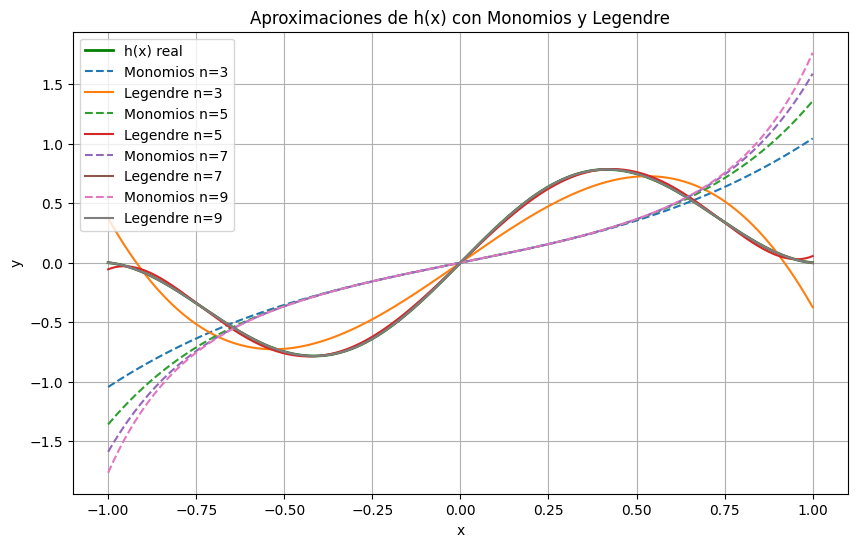

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
import matplotlib.pyplot as plt

#Para este ejercicio, realizaremos nuevamente las expansiones pero esta vez de manera que se evalúen para distintos valores de n al mismo tiempo
h = sp.sin(3*x)*(1-x**2)
h_l = sp.lambdify(x, h, "numpy")

def expansion(h, base):
    coefs = []
    for v in base:
        num = producto_1(h, v)
        den = producto_1(v, v)
        if den != 0:
            coefs.append((num/den)*v)
        else:
            coefs.append(0)
    return sum(coefs)

# Por esta vez, para construir la base de legendre emplearemos la función legendre pues ya encontramos esta base en un inciso anterior y esto nos dará mas agilidad en el proceso ya que estamos mirando distintos valores de n
def monomios(n):
    return [x**k for k in range(n+1)]
def legendre(n):
    return [sp.legendre(k, x) for k in range(n+1)]

# Ahora realizamos las aproximaciones
n_vals = [3, 5, 7, 9]
aprox_mono = []
aprox_leg = []

for n in n_vals:
    P_mono = expansion(h, monomios(n))
    P_leg  = expansion(h, legendre(n))
    aprox_mono.append(sp.lambdify(x, sp.simplify(P_mono), "numpy"))
    aprox_leg.append(sp.lambdify(x, sp.simplify(P_leg), "numpy"))

# Puntos para graficar
xx = np.linspace(-1, 1, 400)
yy = h_l(xx)

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(xx, yy, "g", linewidth=2, label="h(x) real")

for i, n in enumerate(n_vals):
    plt.plot(xx, aprox_mono[i](xx), "--", label=f"Monomios n={n}")
    plt.plot(xx, aprox_leg[i](xx), "-", label=f"Legendre n={n}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximaciones de h(x) con Monomios y Legendre")
plt.legend()
plt.grid(True)
plt.show()
display(Math(r"\textbf{Al realizar la gráfica, se observa que la aproximación con Legendre es mucho más exacta que con los monomios de diversos grados.}"))
display(Math(r"\textbf{Además, se puede concluir que la aproximación con monomios empieza a diferir desde valores de grados muy pequeños, mientras que}"))
display(Math(r"\textbf{el de Legendre empieza a diferir a partir del grado 3 y menores}"))


II) Expanda la función h(x) en términos de la base de monomios y de polinomios de Chebyshev, grafique, compare y encuentre el grado de los polinomios en los cuales difieren las expansiones.

In [9]:
# Repetimos el proceso para la expansion de h(x) en la base de monomios hasta grado n
def monomios(n):
    return [x**k for k in range(n+1)]

h = sp.sin(3*x)*(1-x**2)
n = 9
base_mono = monomios(n+1)

def expandir(h, base, prod):
    expansion = 0
    coeficientes = []
    for p in base:
        c = prod(h, p)/prod(p, p)
        coeficientes.append(sp.simplify(c))
        expansion += c*p
    return coeficientes, sp.expand(sp.simplify(expansion))

coeficientes, expansion = expandir(h, base_mono, producto_1)

display(Math(r"\textbf{Expansión de h(x) en la base ortogonal de monomios hasta grado %d:}" % n))
display(Math(r"\text{Expansión: } \quad %s" % sp.latex(expansion)))

#Ahora hallaremos la expansión de h(x) en la base de los Polinomios de Chebyshev pero emplearemos métodos numéricos para reducir el tiempo
def producto_2num(f, g):
    f_1 = sp.lambdify(x, f, "numpy")
    g_1 = sp.lambdify(x, g, "numpy")
    integrand = lambda t: f_1(t)*g_1(t)*np.sqrt(1-t**2)
    val, _ = quad(integrand, -1, 1)
    return val

#Definimos un nuevo Gram-Schmidt
def base_ort_num(n):
    monomios = [x**k for k in range(n+1)]
    ortogonales = []
    for v in monomios:
        for u in ortogonales:
            den = producto_2num(u, u)
            if abs(den) > 1e-12:
                v = v - (producto_2num(v, u)/den)*u
        den_v = producto_2num(v, v)
        if abs(den_v) > 1e-12:
            ortogonales.append(sp.expand(v))
        else:
            ortogonales.append(sp.Integer(0))
    return ortogonales

# Calculamos hasta n=10
ort_num = base_ort_num(10)
h = sp.sin(3*x)*(1-x**2)

def hallar_expansion_cheb(n):
    expansion = 0
    for v in ort_num[:n+1]:
        if v != 0:
            c = producto_2num(h, v)/producto_2num(v, v)
            expansion += sp.simplify(c*v)
    return sp.expand(expansion)

expansion_cheb = hallar_expansion_cheb(10)

display(Math(r"\textbf{Expansión de h(x) en la base de Polinomios de Chebyshev hasta grado 9:}"))
display(Math(r"\text{Expansión: } \quad %s" % sp.latex(expansion_cheb)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

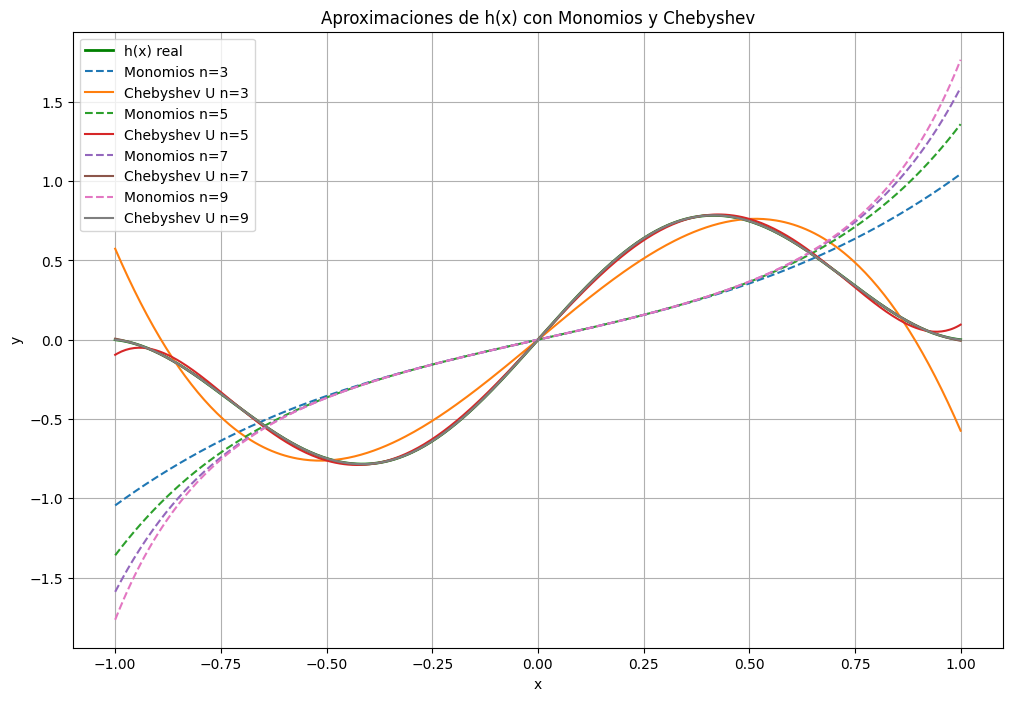

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [26]:
#Al igual que pasa las gráficas del d)II), realizaremos nuevamente las expansiones pero esta vez de manera que se evalúen para distintos valores de n al mismo tiempo
h = sp.sin(3*x)*(1-x**2)
h_l = sp.lambdify(x, h, "numpy")

#Hacemos una nueva funcion de producto interno que pueda escoger entre el producto entre monomios o Chebyshev
def producto_1_o_2(f, g, chebyshev=False):
    if chebyshev:
        f_1 = sp.lambdify(x, f, "numpy")
        g_1 = sp.lambdify(x, g, "numpy")
        integrand = lambda t: f_1(t)*g_1(t)*np.sqrt(1-t**2)
        val, _ = quad(integrand, -1, 1)
        return val
    else:
        return sp.integrate(f*g, (x, -1, 1))

def expansion(h, base, chebyshev=False):
    coefs = []
    for v in base:
        num = producto_1_o_2(h, v, chebyshev=chebyshev)
        den = producto_1_o_2(v, v, chebyshev=chebyshev)
        if den != 0:
            coefs.append((num/den)*v)
        else:
            coefs.append(0)
    return sum(coefs)

# Construimos nuevamente las bases y empleamos la función de chebyshev para ahorrar tiemopo pues en el inciso c) ya hicimos este cálculo de manera extensa
def monomios(n):
    return [x**k for k in range(n+1)]

def chebyshevU(n):
    return [sp.chebyshevu(k, x) for k in range(n+1)]

# Ahora realizamos las aproximaciones
n_vals = [3, 5, 7, 9]
aprox_mono = []
aprox_cheb = []

for n in n_vals:
    P_mono = expansion(h, monomios(n))
    P_cheb = expansion(h, chebyshevU(n), chebyshev=True)
    aprox_mono.append(sp.lambdify(x, sp.simplify(P_mono), "numpy"))
    aprox_cheb.append(sp.lambdify(x, sp.simplify(P_cheb), "numpy"))

# Puntos para graficar
xx = np.linspace(-1, 1, 400)
yy = h_l(xx)

# Graficamos
plt.figure(figsize=(12,8))
plt.plot(xx, yy, "g", linewidth=2, label="h(x) real")

for i, n in enumerate(n_vals):
    plt.plot(xx, aprox_mono[i](xx), "--", label=f"Monomios n={n}")
    plt.plot(xx, aprox_cheb[i](xx), "-", label=f"Chebyshev U n={n}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximaciones de h(x) con Monomios y Chebyshev")
plt.legend()
plt.grid(True)
plt.show()

display(Math(r"\textbf{Al realizar la gráfica, se observa que la aproximación con Chebyshev, al igual que con Legendre es mucho más exacta que con los}"))
display(Math(r"\textbf{monomios de diversos grados. Además, se puede concluir que la aproximación con monomios empieza a diferir desde valores de grados}"))
display(Math(r"\textbf{muy pequeños, mientras que el de Chebyshev empieza a diferir a partir del grado 3 y menores}"))

III) Expanda la función h(x) en términos de la base de polinomios de Legendre y de Chebyshev, grafique, compare y encuentre el grado de los polinomios en los cuales difieren las expansiones

<IPython.core.display.Math object>

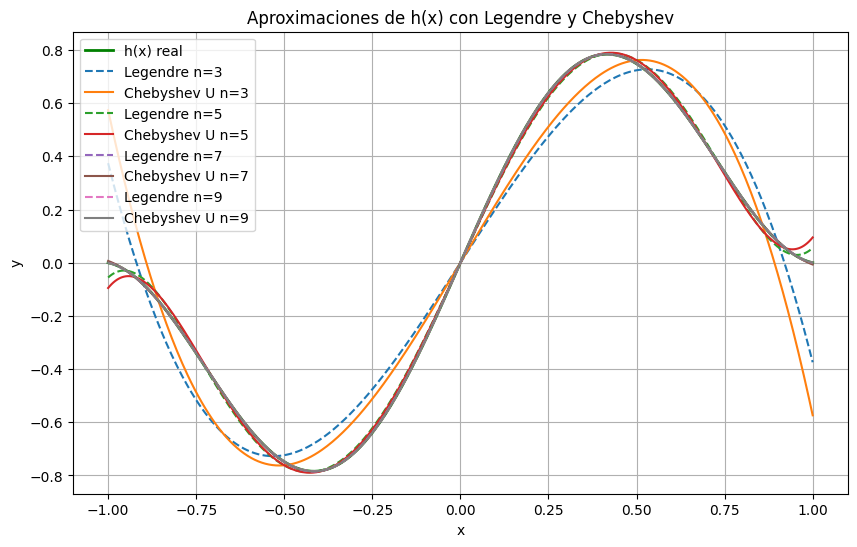

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
display(Math(r"\textbf{En incisos anteriores hicimos la expansión de h(x) en términos de Legendre y Chebyshev, por lo tanto sólo haremos las gráficas}"))

#Como última gráfica, repetimos el mismo proceso que en los incisos d)I) y II) pero para Legendre vs. Chebyshev
h = sp.sin(3*x)*(1-x**2)
h_l = sp.lambdify(x, h, "numpy")

def producto_1_o_2(f, g, chebyshev=False):
    if chebyshev:
        f_1 = sp.lambdify(x, f, "numpy")
        g_1 = sp.lambdify(x, g, "numpy")
        integrand = lambda t: f_1(t)*g_1(t)*np.sqrt(1-t**2)
        val, _ = quad(integrand, -1, 1)
        return val
    else:
        return sp.integrate(f*g, (x, -1, 1))

def expansion(h, base, chebyshev=False):
    coefs = []
    for v in base:
        num = producto_1_o_2(h, v, chebyshev=chebyshev)
        den = producto_1_o_2(v, v, chebyshev=chebyshev)
        if den != 0:
            coefs.append((num/den)*v)
        else:
            coefs.append(0)
    return sum(coefs)

# Construimos nuevamente las bases y empleamos la función de chebyshev y legendre para ahorrar tiempo pues en el inciso b) y c) ya hicimos esos cálculo de manera extensa
def legendre(n):
    return [sp.legendre(k, x) for k in range(n+1)]

def chebyshevU(n):
    return [sp.chebyshevu(k, x) for k in range(n+1)]

# Ahora realizamos las aproximaciones
n_vals = [3, 5, 7, 9]
aprox_leg = []
aprox_cheb = []

for n in n_vals:
    P_leg = expansion(h, legendre(n))
    P_cheb = expansion(h, chebyshevU(n), chebyshev=True)
    aprox_leg.append(sp.lambdify(x, sp.simplify(P_leg), "numpy"))
    aprox_cheb.append(sp.lambdify(x, sp.simplify(P_cheb), "numpy"))

# Puntos para graficar
xx = np.linspace(-1, 1, 400)
yy = h_l(xx)

# Graficamos
plt.figure(figsize=(10,6))
plt.plot(xx, yy, "g", linewidth=2, label="h(x) real")

for i, n in enumerate(n_vals):
    plt.plot(xx, aprox_leg[i](xx), "--", label=f"Legendre n={n}")
    plt.plot(xx, aprox_cheb[i](xx), "-", label=f"Chebyshev U n={n}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximaciones de h(x) con Legendre y Chebyshev")
plt.legend()
plt.grid(True)
plt.show()

display(Math(r"\textbf{Al realizar la gráfica, se observa que la aproximación con Legendre y Chebyshev hacen un buen trabajo, y tanto la de Legendre}"))
display(Math(r"\textbf{como la de Chebyshev parecen empezar a diferir a partir del grado 3 y menores.}"))

IV) Estime en cada caso el error que se comete como función del grado del polinomio (o monomio) de la expansión.

In [34]:
#Definimos una función para estimar el error
import sympy as sp

x = sp.symbols("x")
h = sp.sin(3*x)*(1 - x**2)

# Generamos una nueva función de expansión para incluir el tipo de producto en la operación
def expansion(h, n, base, producto):
    approx = 0
    for v in base:
        num = producto(h, v)
        den = producto(v, v)
        if den != 0:
            approx += (num/den)*v
    return sp.simplify(approx)

# Definimos una función para calculas los errores
def expansion_error(h, n, base, producto):
    Pn = expansion(h, n, base, producto)
    err_sq = producto(h - Pn, h - Pn)
    return sp.sqrt(sp.simplify(err_sq))

# Hacemos los cálculos respectivos
n_vals = [3,5,7,9]
errors = {"monomios": [], "legendre": [], "chebyshevU": []}

for n in n_vals:
    errors["monomios"].append(float(expansion_error(h, n, monomios(n), producto_1).evalf()))
    errors["legendre"].append(float(expansion_error(h, n, legendre(n), producto_1).evalf()))
    errors["chebyshevU"].append(float(expansion_error(h, n, chebyshevU(n), producto_2num).evalf()))

for fam in errors:
    display(Math(f"\\text{{Errores para }} {latex(fam)} \\text{{:}}"))
    for n, err in zip(n_vals, errors[fam]):
        display(Math(f"\\text{{n=}} {latex(n)} \\text{{: }}{latex(format(err, '.6f'))}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>